<h3 style='color:blue' align='center'>Diabetes prediction Using Artificial Neural Network (ANN)</h3>

https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline                                            #1 Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix , classification_report
import pickle    
import json
%matplotlib inline

In [2]:
df = pd.read_csv("dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
class_names=["No Diabetes","Diabetes"]

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()                                                   # if 0    then no duplicate

0

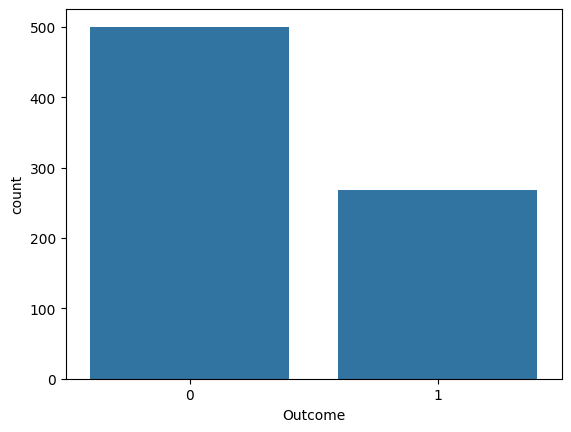

In [7]:
sns.countplot(x='Outcome',data=df)
xlabel='Outcome'

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

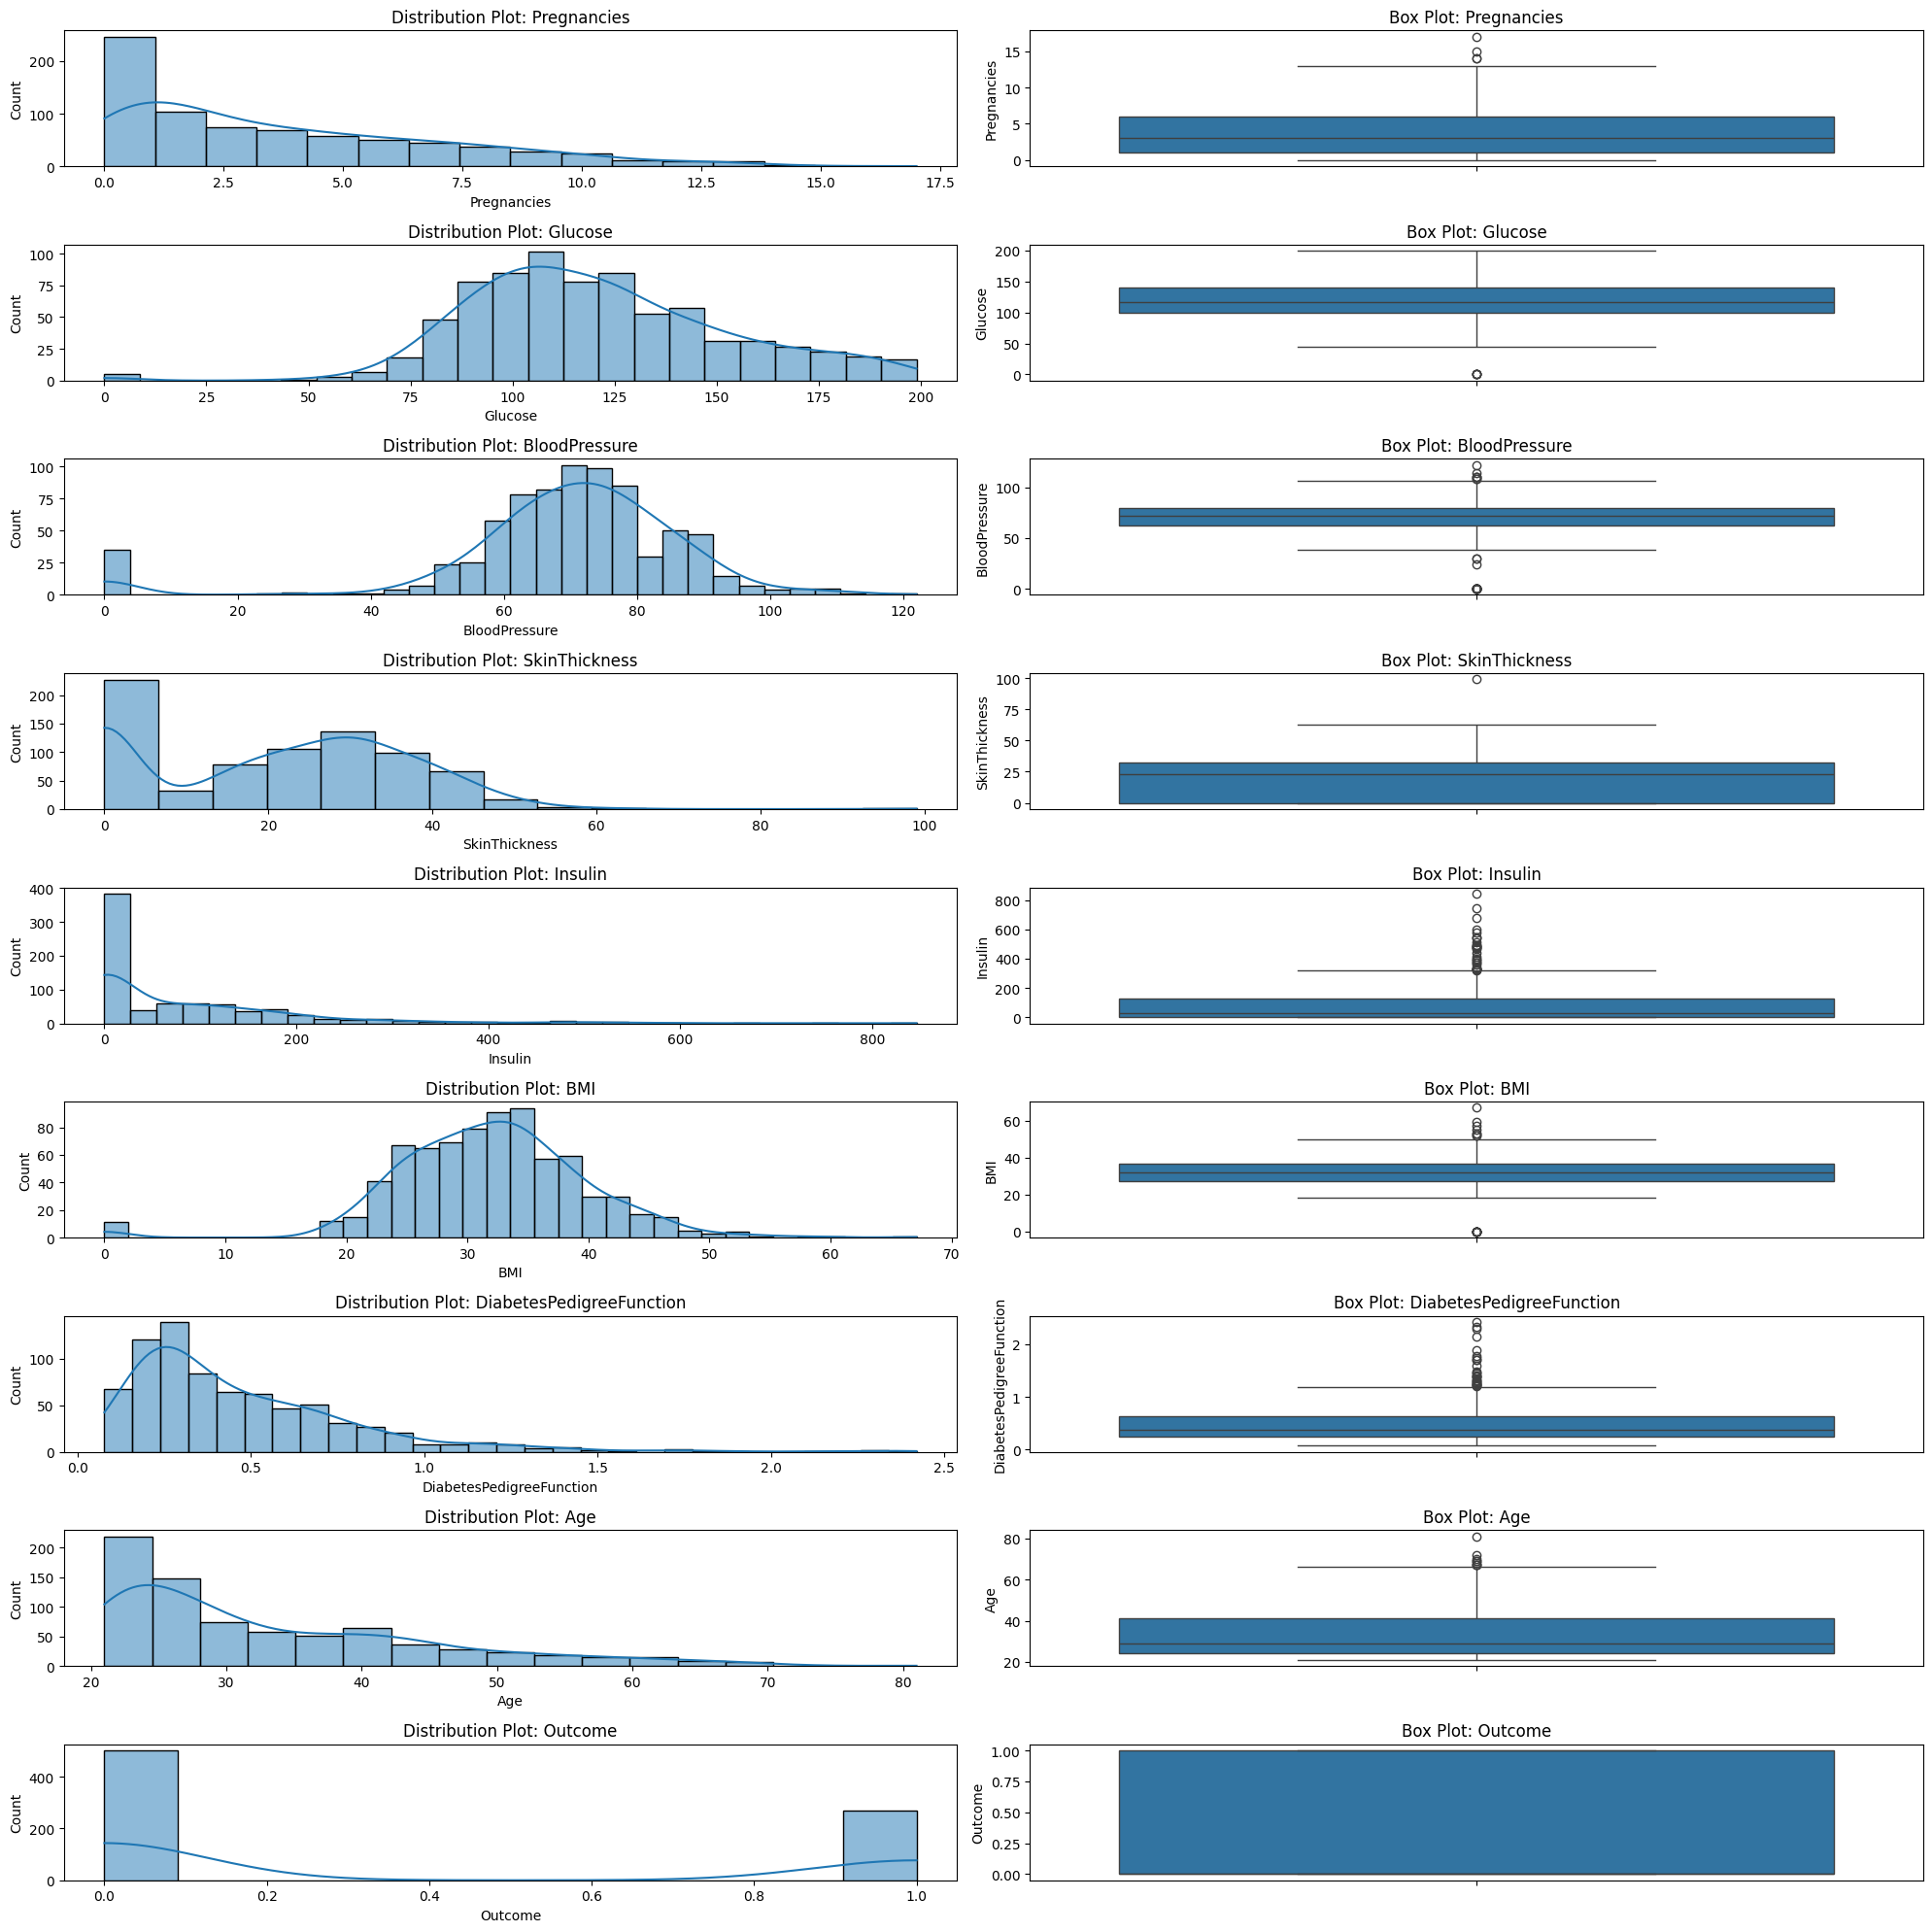

In [9]:
columns = df.columns
n_cols = len(columns)

# Create a figure with subplots
plt.figure(figsize=(20, 20))

for i, col in enumerate(columns, 1):   # 2 5 8 11 14 
    plt.subplot(n_cols, 2, 2 * i - 1)
    plt.title(f'Distribution Plot: {col}')
    sns.histplot(df[col], kde=True)  # Updated to histplot from distplot as distplot is deprecated

    plt.subplot(n_cols, 2, 2 * i)
    plt.title(f'Box Plot: {col}')
    sns.boxplot(y=df[col])

plt.tight_layout()
plt.show()

In [10]:
x=df.drop('Outcome', axis=1)

y= df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Increasing dataset with more balance

In [11]:
#from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [12]:
x_sm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
x_sm=np.array(x_sm)
x_sm[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [14]:
y_sm.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [15]:
y_sm=np.array(y_sm)
y_sm[:5]

array([1, 0, 1, 0, 1], dtype=int64)

### Splitting

In [16]:
#from sklearn.model_selection import train_test_split

#stratified y
x_train, x_test, y_train, y_test=  train_test_split(x_sm,y_sm, test_size=0.2, random_state=1,stratify=y_sm)      #  '''stratified''' splitting  train and test (more accurate)

In [17]:
x_train[:5]

array([[1.00000000e+00, 1.62000000e+02, 7.20000000e+01, 0.00000000e+00,
        0.00000000e+00, 3.87517152e+01, 1.20494569e+00, 3.20000000e+01],
       [4.00000000e+00, 1.42000000e+02, 8.60000000e+01, 0.00000000e+00,
        0.00000000e+00, 4.40000000e+01, 6.45000000e-01, 2.20000000e+01],
       [0.00000000e+00, 1.98000000e+02, 6.60000000e+01, 3.20000000e+01,
        2.74000000e+02, 4.13000000e+01, 5.02000000e-01, 2.80000000e+01],
       [1.00000000e+00, 1.68000000e+02, 8.20000000e+01, 4.50000000e+01,
        1.11000000e+02, 4.82139716e+01, 6.94238942e-01, 2.40000000e+01],
       [7.00000000e+00, 1.07000000e+02, 7.40000000e+01, 0.00000000e+00,
        0.00000000e+00, 2.96000000e+01, 2.54000000e-01, 3.10000000e+01]])

In [18]:
y_train[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

### Pipeline model

In [19]:
# from sklearn.pipeline import Pipeline                                            #1 Pipeline
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.ensemble import RandomForestClassifier

pipe_model= Pipeline( steps=[ 
                        ("scaler", MinMaxScaler()),              # give scaled array of dataframe
                        ("model",RandomForestClassifier(n_estimators=500))
                     ] )
pipe_model.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier(n_estimators=500))])

In [21]:
pipe_model.score(x_test, y_test)

0.83

### prediction

In [22]:
y_pred_test=pipe_model.predict(x_test)
y_pred_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [23]:
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [24]:
def give_diabetes_prediction(inp):
    predictions = pipe_model.predict_proba(inp.reshape(1,-1))
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return {"predicted_class":predicted_class, "confidence":confidence}
print(give_diabetes_prediction(x_test[1]))


{'predicted_class': 'Diabetes', 'confidence': 82.6}


In [27]:
class_names[y_test[1]]

'Diabetes'

# Prediction Analysis

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       100
           1       0.79      0.89      0.84       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



Text(95.72222222222221, 0.5, 'Truth')

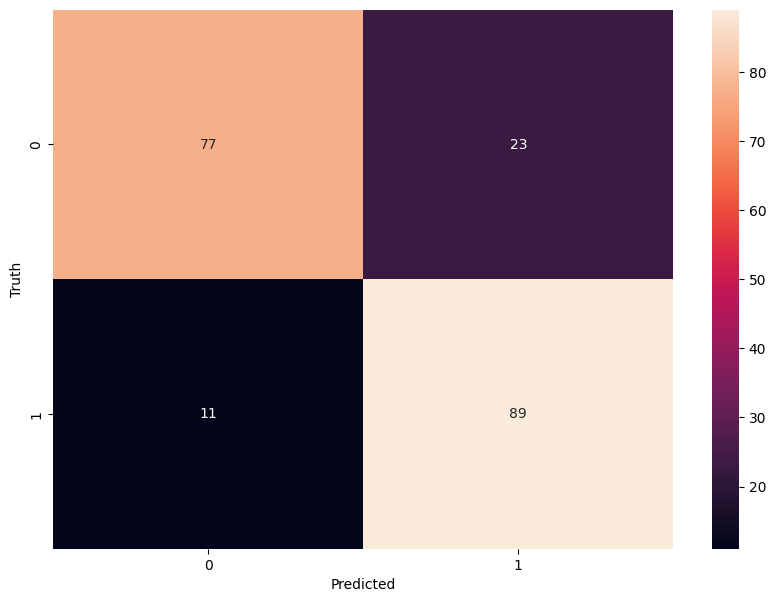

In [28]:
# from sklearn.metrics import confusion_matrix , classification_report

#   from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred_test))
cm = confusion_matrix(y_test,y_pred_test)

#   import seaborn as sn
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Saving Model

In [29]:
# import pickle    
pickle.dump(pipe_model, open("diabetes_model.pkl", "wb"))

In [30]:
# import json
data = {
        "model_path": "diabetes_model.pkl",
        "testx": x_test.tolist(),
        "testy":y_test.tolist(),
        }
json.dump(data, open('test/test.json', 'w') , indent=4)